<a href="https://colab.research.google.com/github/lala991204/DL-self-study/blob/master/3_1_gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

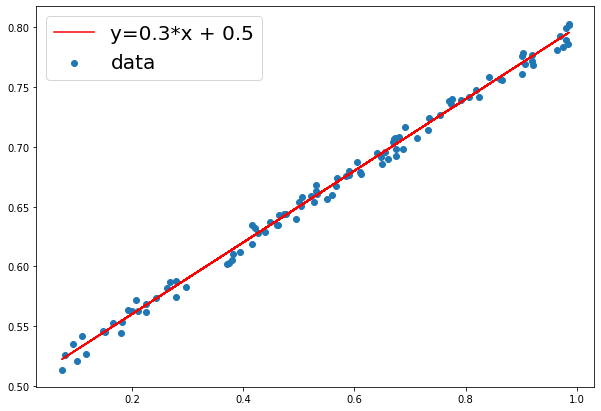

w:0.3, b:0.5


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 샘플에 활용할 데이터셋 만들기
def make_linear(w=0.5, b=0.8, size=50, noise=1.0):       # 임의의 값으로 초기화
    x = np.random.rand(size)
    y = w * x + b
    noise = np.random.uniform(-abs(noise), abs(noise), size=y.shape)
    yy = y + noise                 # 약간의 노이즈도 추가
    plt.figure(figsize=(10, 7))
    plt.plot(x, y, color='r', label=f'y={w}*x + {b}')
    plt.scatter(x, yy, label='data')
    plt.legend(fontsize=20)
    plt.show()
    print(f'w:{w}, b:{b}')
    return x, yy

x, y = make_linear(w=0.3, b=0.5, size=100, noise=0.01) 

In [3]:
# 최대 반복 횟수
num_epoch = 1000

# 학습률(learning_rate)
learning_rate = 0.005

# 에러 기록
errors = []

# random한 값으로 w, b를 초기화
w = np.random.uniform(low=0.0, high=1.0)
b = np.random.uniform(low=0.0, high=1.0)

for epoch in range(num_epoch):  
    # Hypothesis 정의
    y_hat = w * x + b

    # Loss Function 정의
    error = 0.5 * ((y_hat - y) ** 2).sum()       # 0.5는 가중치에 대한 gradient를 계산하기 쉽도록 추가됨
    if error < 0.005:     # error가 .0.005 이내로 수렴하면 반복문 종료!
        break
    # Gradient 미분 계산(loss function을 w,b에 대한 각각의 편미분 값을 구한 뒤 학습률 계수를 곱하여 이전 w,b 값에서 차감한다.)
    w = w - learning_rate * ((y_hat - y) * x).sum()
    b = b - learning_rate * (y_hat - y).sum()

    errors.append(error)

    if epoch % 5 == 0:
        print('{0:2} w={1:.5f}, b={2:.5f} error={3:5f}'.format(epoch, w, b, error))    # {자리 인덱스:자리수 설정}

print("-----" * 15)
print("{0:2} w={1:.1f}, b={2:.1f} error={3:.5f}".format(epoch, w, b, error))

 0 w=0.60378, b=0.52986 error=19.009078
 5 w=0.48729, b=0.39052 error=0.128705
10 w=0.46409, b=0.40320 error=0.099260
15 w=0.44407, b=0.41492 error=0.076852
20 w=0.42651, b=0.42521 error=0.059589
25 w=0.41109, b=0.43424 error=0.046290
30 w=0.39756, b=0.44216 error=0.036044
35 w=0.38568, b=0.44912 error=0.028151
40 w=0.37525, b=0.45523 error=0.022069
45 w=0.36610, b=0.46059 error=0.017384
50 w=0.35807, b=0.46529 error=0.013775
55 w=0.35102, b=0.46942 error=0.010994
60 w=0.34483, b=0.47304 error=0.008852
65 w=0.33940, b=0.47622 error=0.007202
70 w=0.33463, b=0.47901 error=0.005930
---------------------------------------------------------------------------
75 w=0.3, b=0.5 error=0.00495


종료 후 w,b 계수는 샘플 데이터셋 생성시 설정한 w,b 계수와 비슷한 값임을 확인 가능하다.

가중치가 난수 값에 의하여 다르게 초기화되므로 매번 실행할 때마다 수렴 속도에 차이가 있다.

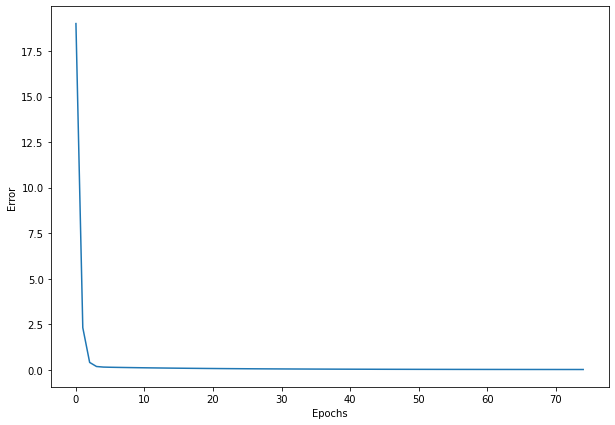

In [4]:
plt.figure(figsize=(10,7))
plt.plot(errors)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()